Until [afni/afni#156 (🐍 lib_afni1D — Python 2→3)](https://github.com/afni/afni/pull/156) is resolved,

```bash
pip install "git+https://github.com/shnizzedy/afni.git@lib_afni1D/2→3#egg=afni-python&subdirectory=src/python_scripts"
```

to pip-install a Python 3 compatible `afni_python`.

In [1]:
%load_ext autoreload
%autoreload 2

# 🧙 magics

```YAML
features:
  GS
  CSF
  WM
  tCompCor0
  aCompCor0
  aCompCor1
  aCompCor2
  aCompCor3
  aCompCor4
  FD
subjects:
  25427
  25428
  25429
  25430
  25431
  25432
  25433
  25434
  25435
  25436
  25437
  25438
  25439
  25440
  25441
  25442
  25443
  25444
  25445
  25446
  25447
  25448
  25449
  25450
  25451
  25452
  25453
  25454
  25455
  25456
data:
  -
    software: C-PAC
    version: 1.6.1
    path: /data3/cnl/fmriprep/AllNewRun/on_nuisance_1
  -
    software: fmriprep
    version: ???
    path: /data3/cnl/fmriprep/AllNewRun/fmriprep_1
```

#### Configuration needed

* [ ] feature list
* [ ] subject × session list
* [ ] 2 output datasets
    * [ ] path to dataset
    * [ ] software of dataset
        * [ ] name
        * [ ] version

In [2]:
# imports
import git
import glob
import numpy as np
import os
import pandas as pd
import yaml

from string import ascii_lowercase

from compare import Correlation_Matrix
from configs.defaults import motion_list, regressor_list
from configs.subjects import fmriprep_sub, generate_subject_list_for_range

In [3]:
# args
outputs_root = os.path.expanduser("/data3/cnl/fmriprep/AllNewRun")
benchmark = {
    "software": "fmriprep",
    "run": 1
}
this_run_path = "on_nuisance_1"

In [4]:
# Load config
with open('configs/benchmarks.yml', 'r') as config_file:
    benchmarks = yaml.safe_load(config_file)

with open('configs/cpac.yml', 'r') as config_file:
    config_settings = yaml.safe_load(config_file)
    
cpac_dir = os.path.abspath(os.path.join(os.getcwd(), *[os.pardir for i in range(3)]))    
n_cpus = 10
pipeline_config_path = os.path.join(cpac_dir, 'dev/docker_data/')
pipeline_file = 'default_pipeline.yml'
pipeline_name = pipeline_file.split('.yml')[0]
tag = git.Repo(search_parent_directories=True).head.object.hexsha[:7]
outputs_dir = os.path.join(config_settings['this_run_outputs'], tag)
benchmark_path = benchmarks[benchmark['software']][benchmark['run']]
if 'this_run' not in vars():
    this_run = {
        "software": "C-PAC",
        "version": tag,
        "config": pipeline_name
    }
sub_list = generate_subject_list_for_range(
    (
        config_settings['subjects']['start'],
        config_settings['subjects']['stop']
    ),
    (1, 1)
)
var_list = regressor_list + motion_list

In [5]:
corrs = Correlation_Matrix(sub_list, var_list, [
    {"software": "C-PAC", "run_path": os.path.join(outputs_root, this_run_path)},
    {"software": "fmriprep", "run_path": os.path.join(outputs_root, benchmark_path)}
])

Running subject: 0 0 correlation score: 0.9321693576600344
Running subject: 0 1 correlation score: 0.9857740702741887
Running subject: 0 2 correlation score: 0.9873561862898702
Running subject: 0 3 correlation score: -0.6273528499002714
Running subject: 0 4 correlation score: -0.5500960145642857
Running subject: 0 5 correlation score: 0.4981371905970558
Running subject: 0 6 correlation score: 0.4124911414444269
Running subject: 0 7 correlation score: 0.3439110554539619
Running subject: 0 8 correlation score: -0.48325360324563066
Running subject: 0 9 correlation score: 0.8847096196288757
Running subject: 1 0 correlation score: 0.9968678028837642
Running subject: 1 1 correlation score: 0.9833967114718956
Running subject: 1 2 correlation score: 0.9914196693986737
Running subject: 1 3 correlation score: 0.5871838812198334
Running subject: 1 4 correlation score: 0.9467169746634363
Running subject: 1 5 correlation score: -0.8030418080617059
Running subject: 1 6 correlation score: 0.824962926

Running subject: 19 9 correlation score: 0.9111537206062599
Running subject: 20 0 correlation score: 0.9829938167920912
Running subject: 20 1 correlation score: 0.9916634687209808
Running subject: 20 2 correlation score: 0.9856840346278133
Running subject: 20 3 correlation score: -0.019374669383216303
Running subject: 20 4 correlation score: 0.9158789786395402
Running subject: 20 5 correlation score: 0.3719742956580633
Running subject: 20 6 correlation score: -0.4603687399263173
Running subject: 20 7 correlation score: 0.7632043376935101
Running subject: 20 8 correlation score: -0.37176178850124947
Running subject: 20 9 correlation score: 0.6519509948032601
Running subject: 21 0 correlation score: 0.9879452313360593
Running subject: 21 1 correlation score: 0.9924191976901081
Running subject: 21 2 correlation score: 0.9685960854979869
Running subject: 21 3 correlation score: 0.16167418639820086
Running subject: 21 4 correlation score: -0.7494761841175089
Running subject: 21 5 correlatio

In [6]:
corrs.print_filepaths()

,C-PAC,fmriprep
sub-0025427_ses-1 GS,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 CSF,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 WM,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 tCompCor0,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor0,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor1,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor2,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor3,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 aCompCor4,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/working/resting_preproc_sub-0025427a_ses-1/nuisance_0_0/_scan_rest_run-1/_selector_WM-2mm-M_CSF-2mm-M_tC-5PCT-PC5_aC-CSF+WM-2mm-PC5_G-M_M-SDB_P-2_BP-B0.01-T0.1/build_nuisance_regressors/nuisance_regressors.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/output/fmriprep/sub-0025427a/func/sub-0025427a_task-rest_run-1_desc-confounds_regressors.tsv
sub-0025427_ses-1 FD,/data3/cnl/fmriprep/AllNewRun/on_nuisance_1/output/pipeline_cpac_default_nuisance/sub-0025427a_ses-1/frame_wise_displacement_power/_scan_rest_run-1/FD.1D,/data3/cnl/fmriprep/AllNewRun/fmriprep_1/working/fmriprep_wf/single_subject_0025427a_wf/func_p

---

In [7]:
# Save matrix
import scipy.io as sio

save_path = "/home/jon/CNL/corrs.mat"
sio.savemat(save_path, {'corrs':corrs.corrs})

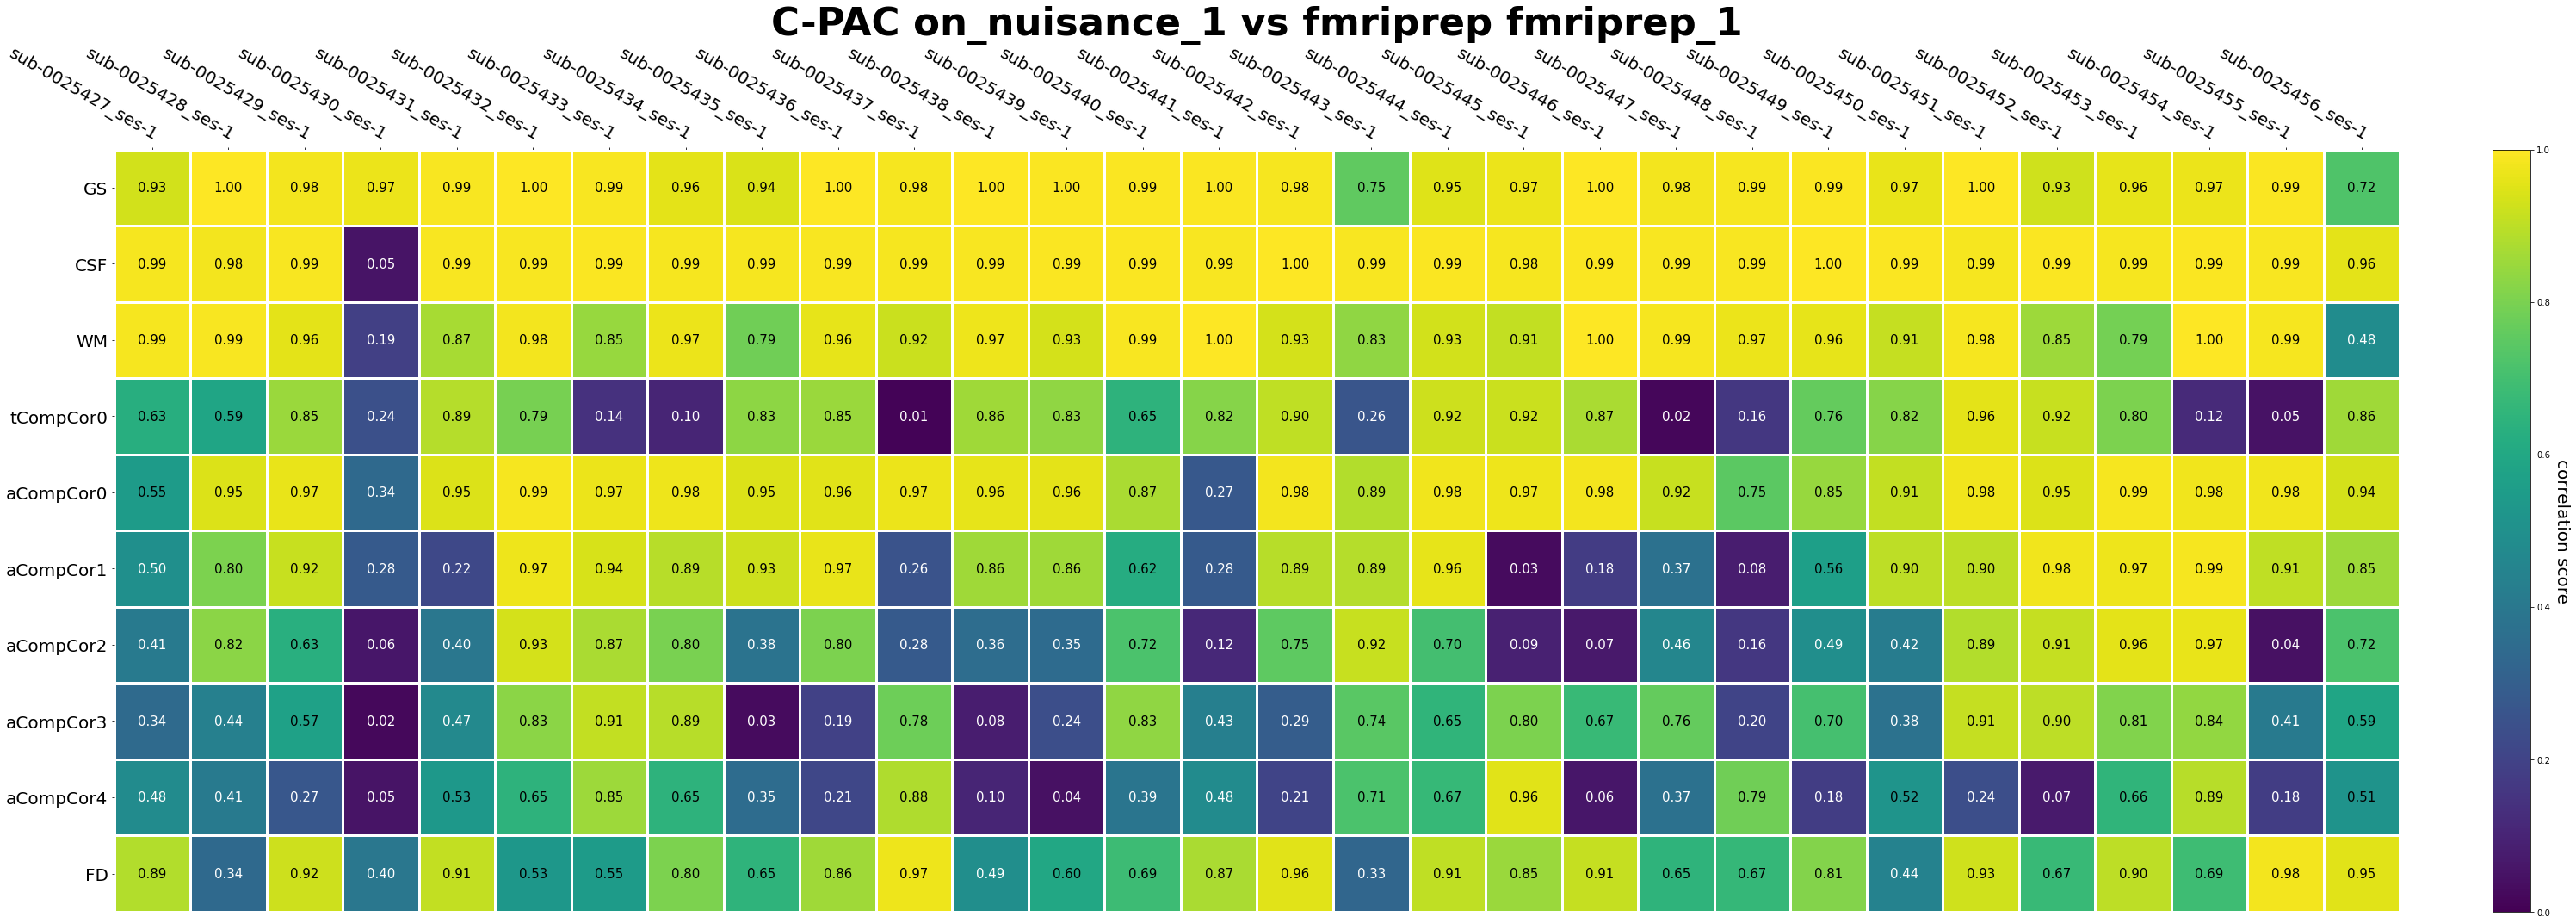

In [8]:
from configs.defaults import motion_list, regressor_list
from heatmaps import generate_heatmap, reshape_corrs
from configs.subjects import generate_subject_list_for_range

generate_heatmap(
    reshape_corrs(save_path),
    regressor_list + motion_list,
    generate_subject_list_for_range(
        (25427, 25456), (1, 2)
    ),
    save_path=False,
    title=f"C-PAC {this_run_path} vs fmriprep {benchmark_path}"
)